<a href="https://colab.research.google.com/github/AmiraElsharkawy26/Thesis-Project/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [2]:
#Loading the data set 
from google.colab import files
uploaded = files.upload()



Saving Filtered Data.csv to Filtered Data (1).csv


In [3]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Filtered Data.csv']))

# Data Preparation

### Data Cleaning & Preprocessing

In [4]:
# Number of fraud transactions before handeling the data
len(df[df['isFraud']==1])

1192

In [5]:
# Number of non-fraud transactions before handeling the data
len(df[df['isFraud']==0])

2038

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
2,1,TRANSFER,2806.00,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
3,1,CASH_OUT,2806.00,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
4,1,TRANSFER,20128.00,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3225,95,PAYMENT,1902.10,C1738561265,0.0,0.0,M497786326,0.0,0.0,0,0
3226,95,PAYMENT,5568.56,C611739613,0.0,0.0,M1862900975,0.0,0.0,0,0
3227,95,PAYMENT,406.11,C184244257,0.0,0.0,M1275011461,0.0,0.0,0,0
3228,95,PAYMENT,15028.75,C1545666472,0.0,0.0,M2146303527,0.0,0.0,0,0


In [7]:
df['isFlaggedFraud'].unique()

array([0])

In [8]:
df['isFraud'].unique()

array([1, 0])

In [9]:
df.info

<bound method DataFrame.info of       step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0        1  TRANSFER    181.00  C1305486145          181.0             0.0   
1        1  CASH_OUT    181.00   C840083671          181.0             0.0   
2        1  TRANSFER   2806.00  C1420196421         2806.0             0.0   
3        1  CASH_OUT   2806.00  C2101527076         2806.0             0.0   
4        1  TRANSFER  20128.00   C137533655        20128.0             0.0   
...    ...       ...       ...          ...            ...             ...   
3225    95   PAYMENT   1902.10  C1738561265            0.0             0.0   
3226    95   PAYMENT   5568.56   C611739613            0.0             0.0   
3227    95   PAYMENT    406.11   C184244257            0.0             0.0   
3228    95   PAYMENT  15028.75  C1545666472            0.0             0.0   
3229    95   PAYMENT  32101.86   C797416363            0.0             0.0   

         nameDest  oldbalanceDe

In [10]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
#Checking when does fraud transactions occur
rslt_df = df[df['isFraud'] == 1]
rslt_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
4,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2315,2,CASH_OUT,25975.86,C1004271827,25975.86,0.0,C451934410,98152.0,28041.27,1,0
2323,2,TRANSFER,26768.50,C457596841,26768.50,0.0,C1956477953,0.0,0.00,1,0
2324,2,CASH_OUT,26768.50,C682812632,26768.50,0.0,C256417920,101976.0,128744.50,1,0
2354,2,TRANSFER,30521.02,C903383636,30521.02,0.0,C904300960,0.0,0.00,1,0


In [12]:
#Fraud transactions occur only with (Transfer and Cash_out) types of transactions
rslt_df['type'].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [13]:
# delete all rows with column 'type' has any values other than (Transfer and Cash_out)
indexAge = df[ (df['type'] != 'TRANSFER') & (df['type'] != 'CASH_OUT') ].index
df.drop(indexAge , inplace=True)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2430,3,CASH_OUT,169614.88,C1892560818,785.74,0.00,C728885526,332349.29,345283.88,0,0
2431,3,CASH_OUT,37393.74,C689749616,20868.38,0.00,C1345063038,71203.56,108597.29,0,0
2432,3,CASH_OUT,228693.31,C1958403865,30003.00,0.00,C1592415783,17515.23,246208.54,0,0
2433,3,TRANSFER,98830.07,C137453130,498809.20,399979.13,C476800120,49864.36,148694.43,0,0


In [14]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2430,3,CASH_OUT,169614.88,C1892560818,785.74,0.00,C728885526,332349.29,345283.88,0,0
2431,3,CASH_OUT,37393.74,C689749616,20868.38,0.00,C1345063038,71203.56,108597.29,0,0
2432,3,CASH_OUT,228693.31,C1958403865,30003.00,0.00,C1592415783,17515.23,246208.54,0,0
2433,3,TRANSFER,98830.07,C137453130,498809.20,399979.13,C476800120,49864.36,148694.43,0,0


In [15]:
# Checking the number of fraud and non-fraud transaction 
df['isFraud'].value_counts()

0    1243
1    1192
Name: isFraud, dtype: int64

In [16]:
df['type'].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [17]:
df['isFraud'].unique()

array([1, 0])

In [18]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2435.000000,2.435000e+03,2.435000e+03,2.435000e+03,2.435000e+03,2.435000e+03,2435.000000,2435.0
mean,1.118686,7.149391e+05,6.282150e+05,4.778772e+04,1.246127e+06,1.893820e+06,0.489528,0.0
std,0.379584,1.516198e+06,1.694881e+06,4.712667e+05,2.843251e+06,3.585102e+06,0.499993,0.0
min,1.000000,1.190000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,6.965601e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,1.000000,1.953143e+05,3.147911e+04,0.000000e+00,1.118466e+05,2.711525e+05,0.000000,0.0
75%,1.000000,5.589585e+05,3.614608e+05,0.000000e+00,8.733510e+05,1.897350e+06,1.000000,0.0
max,3.000000,1.000000e+07,1.990000e+07,9.887819e+06,3.300000e+07,3.460000e+07,1.000000,0.0


In [19]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

## Visualization

<ipython-input-20-f929c62f10c0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds');


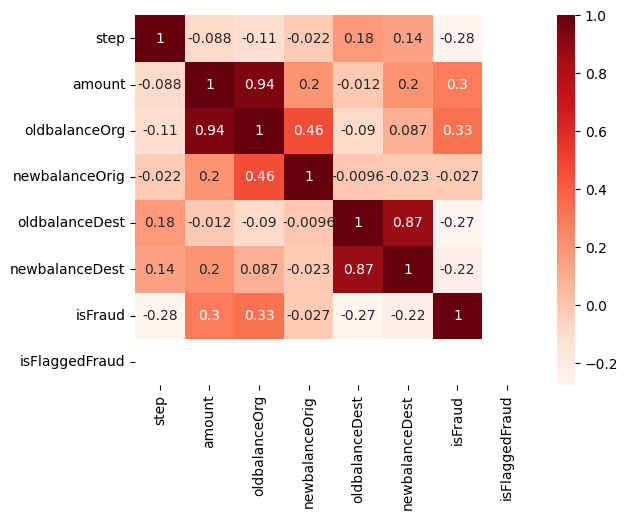

In [20]:
# Checking correlation using heat-map
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='Reds');

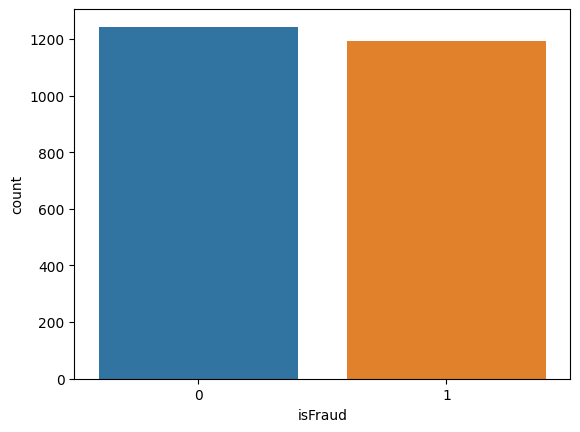

In [21]:
#Checking whether data is balanced or not
sns.countplot(x=df['isFraud']);

In [22]:
# Number of  values of fraud and non-fraud transactions
df['isFraud'].value_counts()

0    1243
1    1192
Name: isFraud, dtype: int64

In [23]:
#Checking the percentage of fraud transactions against non-fraud transactions
df['isFraud'].value_counts() / df['isFraud'].count()

0    0.510472
1    0.489528
Name: isFraud, dtype: float64

In [24]:
# Since (Step) has very weak correlation with the rest of the columns we will delete it
# Also will delete (nameOrig) and (nameDest) since they don't have any effect on whether a transaction is fraud or not
# (isFlaggedFraud) will be also deleted since it only contain zeroes and doesn't have any effect on the transactions


df=df[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']]
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
2,TRANSFER,2806.00,2806.00,0.00,0.00,0.00,1
3,CASH_OUT,2806.00,2806.00,0.00,26202.00,0.00,1
4,TRANSFER,20128.00,20128.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
2430,CASH_OUT,169614.88,785.74,0.00,332349.29,345283.88,0
2431,CASH_OUT,37393.74,20868.38,0.00,71203.56,108597.29,0
2432,CASH_OUT,228693.31,30003.00,0.00,17515.23,246208.54,0
2433,TRANSFER,98830.07,498809.20,399979.13,49864.36,148694.43,0


## One-Hot Encoding on Categorical Column

In [25]:
categorical_columns = ['type',]
df = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

## Normalization

In [26]:
 ## Applying min-max Normalization on the numerical columns

numerical_columns = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

df[numerical_columns] = ( 
    
df[numerical_columns] - df[numerical_columns].min()) 
(df[numerical_columns].max() - df[numerical_columns].min())

amount             9999881.00
oldbalanceOrg     19900000.00
newbalanceOrig     9887819.06
oldbalanceDest    33000000.00
newbalanceDest    34600000.00
dtype: float64

# Modelling

# 1. Random Forest Model

We will split the data and test it using (Cross validation or leave-one-out)

In [27]:
df_RF = df.copy()

In [28]:
X = df_RF.drop('isFraud', axis=1)
y = df_RF['isFraud']

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#Importing and using cross validation to test the model with K-folds = 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9782466437293396


In [30]:
#Fitting the model
clf.fit(X,y)

RandomForestClassifier()

# 2. Logistic Regression Model

In [31]:
df_LR = df.copy()

In [32]:
X = df_RF.drop('isFraud', axis=1)
y = df_RF['isFraud']

In [33]:
# Initiating the model
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
lr_model = LogisticRegression(max_iter = 2000 )

#Importing and using cross validation to test the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy')
print (scores.mean())

0.9449740268501653


In [34]:
#Fitting the model
%timeit lr_model.fit(X, y)

22.5 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 3. KNN Model

In [35]:
#Creating a copy of the dataframe to be used for KNN model
df_KNN = df.copy()

In [36]:
X = df_RF.drop('isFraud', axis=1)
y = df_RF['isFraud']

In [37]:
#Choosing the K value with the best accuracy
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
#Importing and using cross validation to test the model with K-folds = 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, X, y,cv=10, scoring='accuracy')
print (scores.mean())

0.9121348579909601


In [38]:
#Fitting the model
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

##Conclusion for KNN 

K=3 produced the best accuracy, precision, recall and f1_score values
and by increasing the k value these values decrease slightly
As a result K = 3 is chosen for this model
Accuracy = 95.770

# Evaluation

## Random Forest

In [39]:
#Random Forest - Calculating Accuracy, Precision, Recall and F1_score of the model
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
pred = clf.predict(X)
print('Accuracy:',accuracy_score(y,pred))
print('=======================================')
print('Precision: ',precision_score(y,pred))
print('=======================================')
print('Recall: ',recall_score(y,pred))
print('=======================================')
print('F1_score: ',f1_score(y,pred))

Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1_score:  1.0


In [40]:
#Random Forest - Plotting the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[1217,   26],
       [  29, 1163]])

In [41]:
# Random Forest Classifier scoring execution time
%timeit clf.score(X, y)

42.7 ms ± 4.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Logisitc Regression

In [42]:
#Calculating Accuracy, Precision, Recall and F1_score of the model
from sklearn.metrics import f1_score, precision_score, recall_score
pred = lr_model.predict(X)
print('Accuracy:',accuracy_score(y,pred))
print('=======================================')
print('Precision: ',precision_score(y,pred))
print('=======================================')
print('Recall: ',recall_score(y,pred))
print('=======================================')
print('F1_score: ',f1_score(y,pred))


Accuracy: 0.9453798767967145
Precision:  0.9329517579721995
Recall:  0.9572147651006712
F1_score:  0.9449275362318842


In [43]:
#Plotting the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(lr_model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[1159,   84],
       [  50, 1142]])

In [44]:
# Logistic Regression scoring execution time
%timeit lr_model.score(X, y)

3.13 ms ± 321 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## KNN 

In [45]:
#Calculating Accuracy, Precision, Recall and F1_score of the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
pred = knn_model.predict(X)
print('Accuracy:',accuracy_score(y,pred))
print('=======================================')
print('Precision: ',precision_score(y,pred))
print('=======================================')
print('Recall: ',recall_score(y,pred))
print('=======================================')
print('F1_score: ',f1_score(y,pred))


Accuracy: 0.9577002053388091
Precision:  0.9548872180451128
Recall:  0.9588926174496645
F1_score:  0.956885726245291


In [46]:
#Plotting the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(knn_model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[1131,  112],
       [ 102, 1090]])

In [47]:
# K-nearst Neighbors Classifier scoring execution time

%timeit knn_model.score(X, y)

69.6 ms ± 3.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Conclusion

According to the 3 models persented, Random Forest is overfitting with accuracy = 100%
However, KNN has the best accuracy score = 95.770 however, it has the highest excution time = 80.6 ms  

